In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from insolation_model import vis
from insolation_model.geometry.topography import dem_to_hillshade

from insolation_model.geometry.insolation import insolation_coefficient

from topo import dem

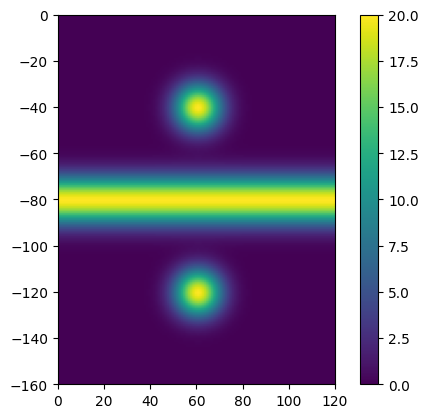

<Axes: >

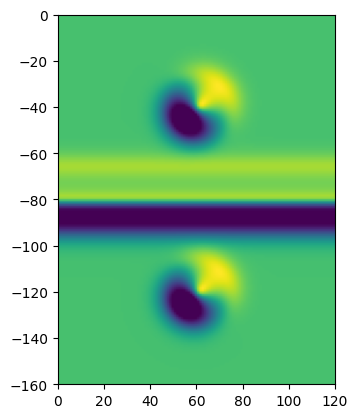

In [2]:
vis.raster(dem, cbar=True)
plt.show()
vis.hillshade(dem, solar_azimuth=45, solar_elevation=45, vmin=0, vmax=1)

0
*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))


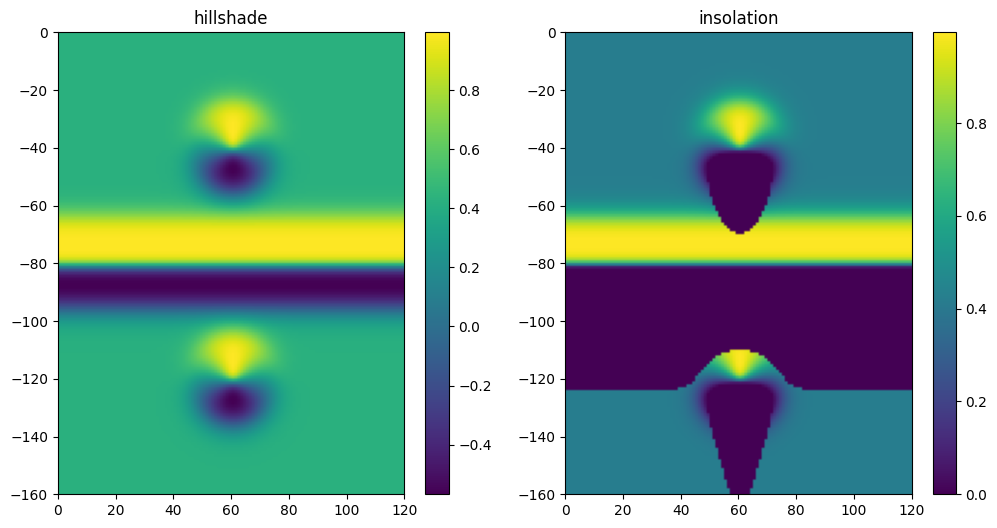

350
*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))


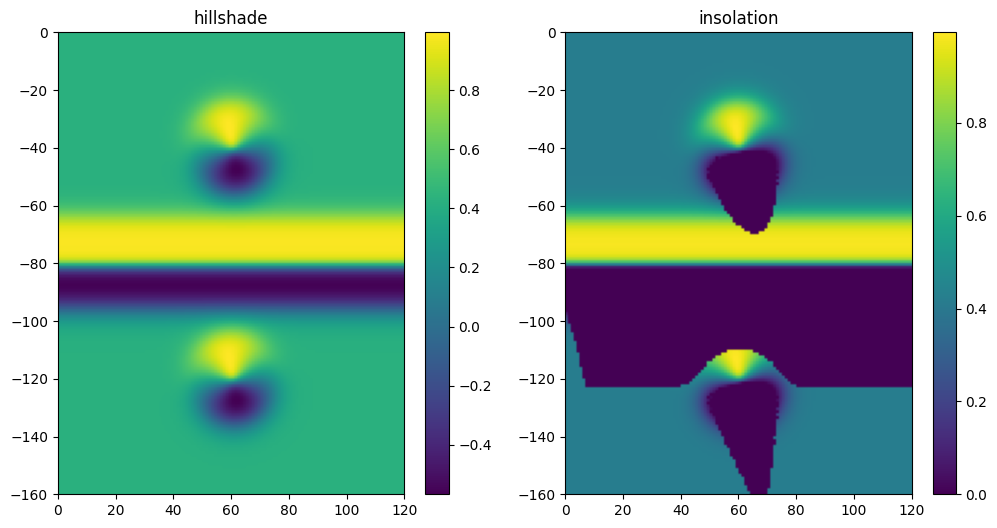

330
*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))


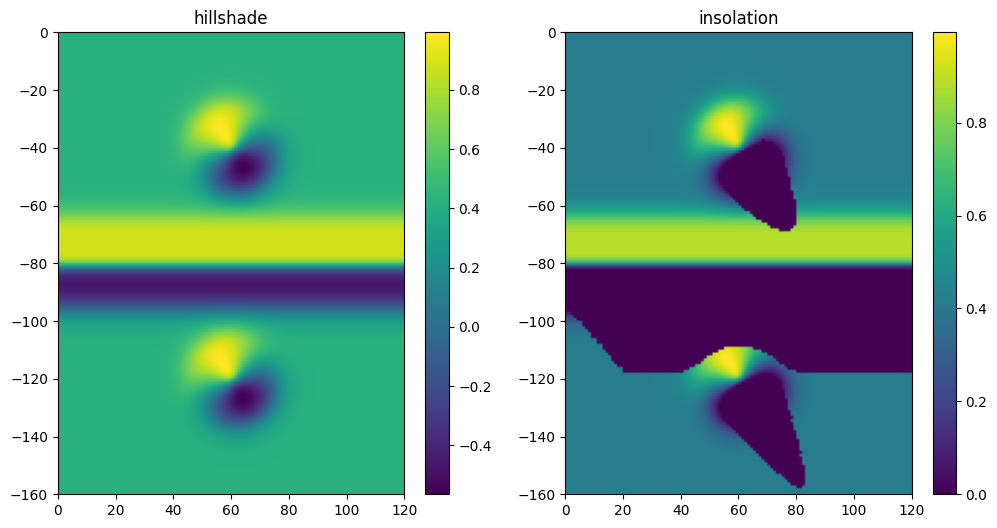

320
*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))


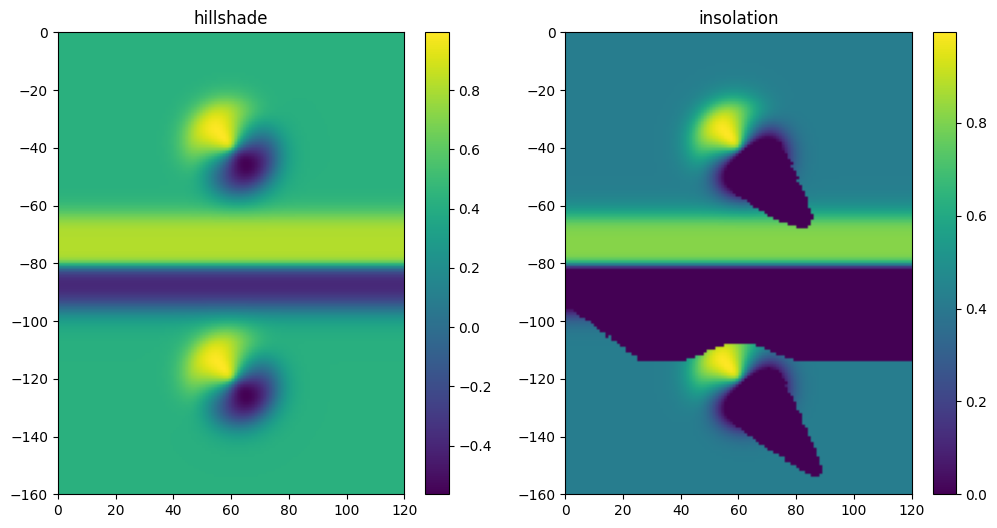

315
*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))*(*(*))


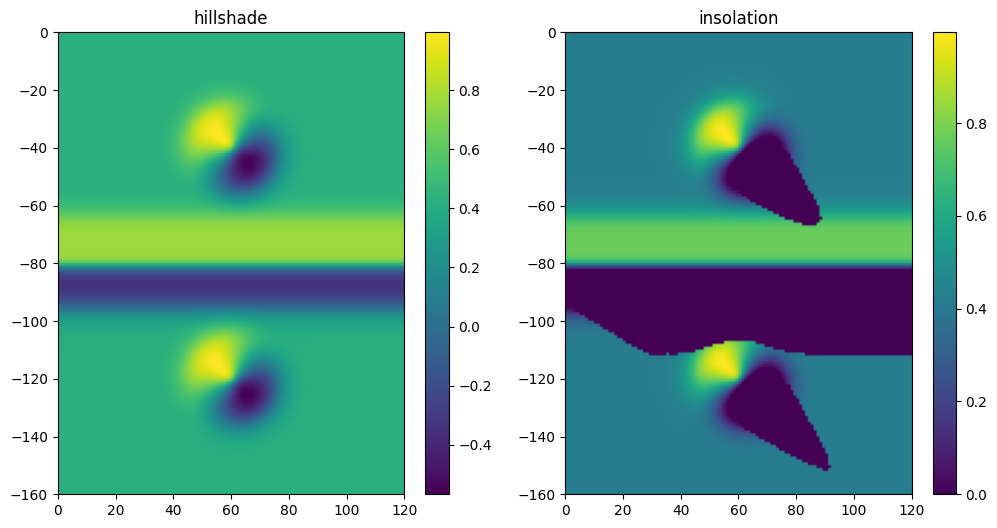

In [3]:
solar_elevation_angle = 25

for solar_azimuth_angle in -np.array([0, 10, 30, 40, 45]) % 360:
    print(solar_azimuth_angle)

    hillshade = dem_to_hillshade(
        dem, solar_azimuth=solar_azimuth_angle, solar_elevation=solar_elevation_angle
    )
    insolation = dem.with_array(
        insolation_coefficient(dem, solar_azimuth_angle, solar_elevation_angle)
    )

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    axes = axes.flatten()
    vis.raster(hillshade, ax=axes[0], cbar=True)
    axes[0].set_title("hillshade")
    vis.raster(insolation, ax=axes[1], cbar=True)
    axes[1].set_title("insolation")

    plt.show()